# Framework for exploring results

## Imports and utilities

In [ ]:
import os
import pickle
import time
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, Normalize

!git clone https://github.com/manuelemacchia/incremental-learning-image-classification.git
!mv -v incremental-learning-image-classification/* .
!rm -rf incremental-learning-image-classification README.md

assert os.path.isdir('./results')

from utils import plot

In [2]:
# Pickle file handling
def obj_save(obj, name):
    with open('results/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

    files.download('results/'+ name + '.pkl') 

def obj_load(name):
    with open('results/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Utility function to move the midpoint of a colormap
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


# Display confusion matrix heatmaps
DPI = 100
def cm(conf_mat, save_name=None):
    fig, ax = plt.subplots(figsize=(5, 5), dpi=DPI)
    ax = sns.heatmap(conf_mat, square=True, cmap='Blues', norm=MidpointNormalize(midpoint=10))
    plt.show()

    if save_name is not None:
        plt.savefig(save_name + '.eps', format='eps')

# Show stats
def stats(logs, key, display=False):
    test_accuracy = [[logs[run_i][i][key] for i in range(10)] for run_i in range(3)]
    test_accuracy = np.array(test_accuracy)
    test_accuracy_stats = np.array([test_accuracy.mean(0), test_accuracy.std(0)]).transpose()
    
    if display:
        print("mean\tstd")
        for i in range(10):
            print(f"{test_accuracy_stats[i, 0]:.5f}\t{test_accuracy_stats[i, 1]:.5f}")
    else:
        print(test_accuracy_stats)

## Example: iCaRL logs

In [3]:
# Load iCaRL logs
icarl_logs = obj_load('baselines/icarl')

`icarl_logs[i][j]` contains a dictionary containing all data regarding the `j`-th incremental step at the `i`-th run.

In [4]:
print(f"Total number of runs: {len(icarl_logs)}")
print(f"Total number of splits: {len(icarl_logs[0])}")

Total number of runs: 3
Total number of splits: 10


In [5]:
# Show recorded data (the type of logs vary among methods)
icarl_logs[0][0].keys()

dict_keys(['accuracy', 'train_loss', 'train_accuracy', 'val_loss', 'val_accuracy', 'conf_mat', 'weight', 'bias'])

In [6]:
# Report the mean and standard deviation of the accuracy on the test set at each
# incremental step, computed across all three runs
stats(icarl_logs, 'accuracy', True)

mean	std
0.88267	0.01228
0.78517	0.02003
0.72278	0.03300
0.66033	0.02373
0.61427	0.01813
0.57961	0.00564
0.54514	0.01428
0.51729	0.01020
0.49444	0.00730
0.46723	0.00643


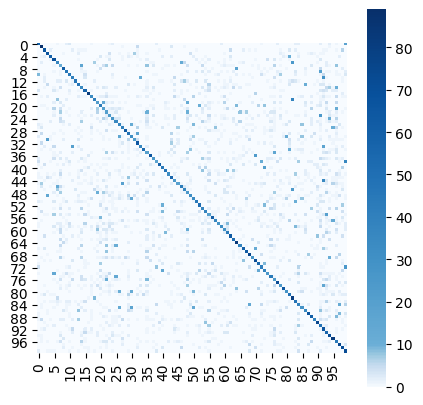

In [7]:
# Plot the confusion matrix of the last training step of the first run
cm(icarl_logs[0][9]['conf_mat'])

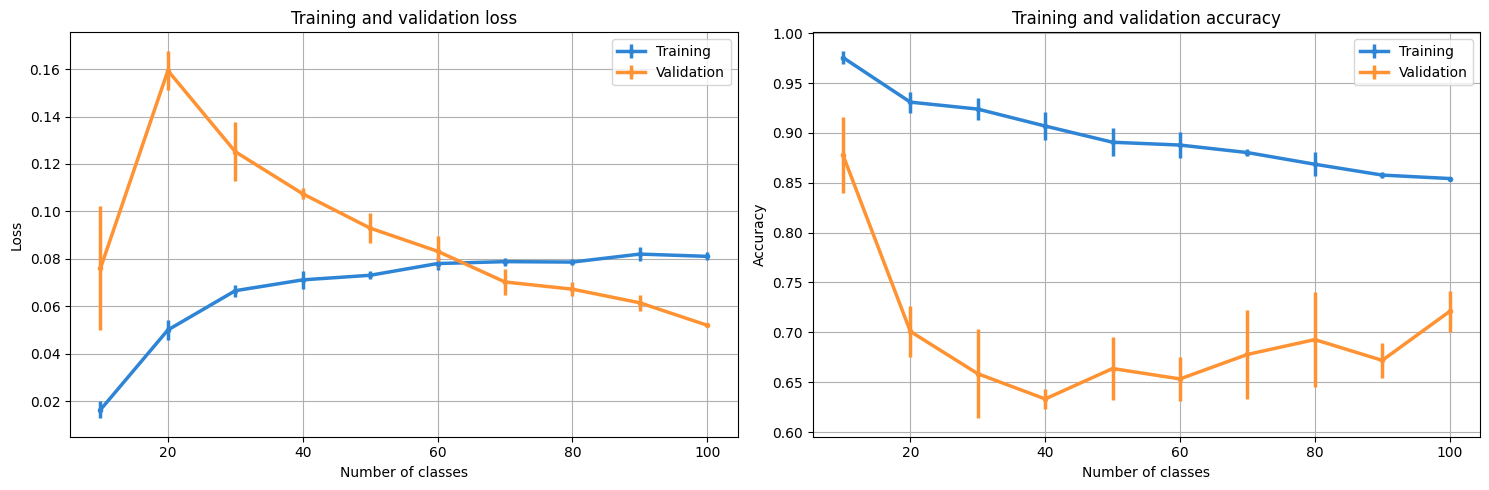

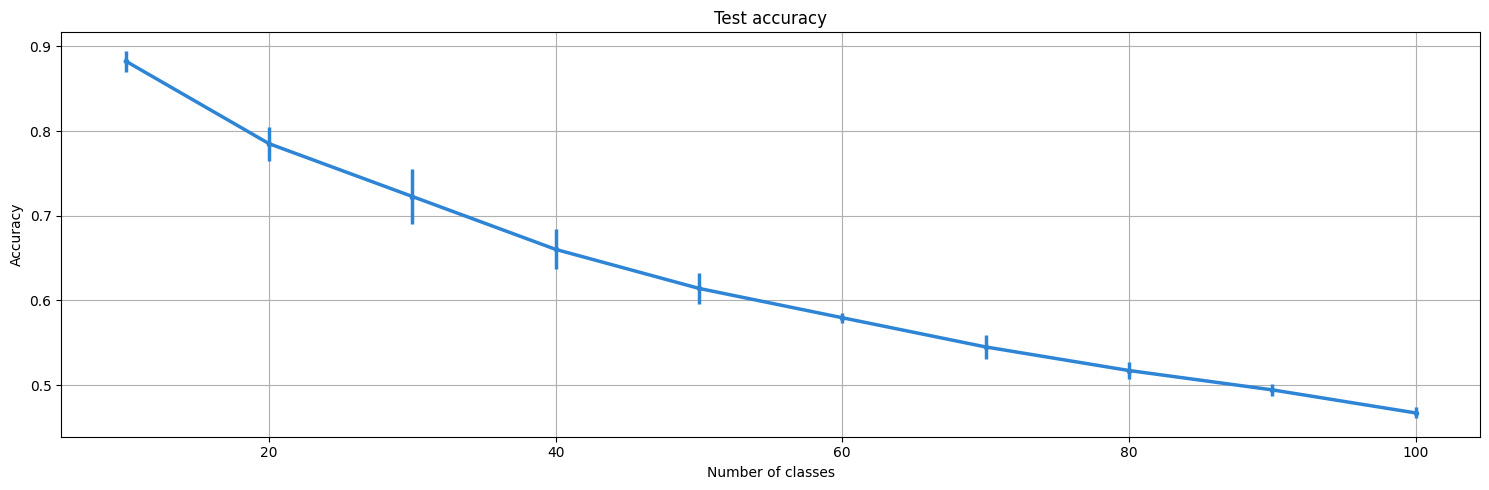

In [8]:
# Show training, validation and test plots for loss and accuracy
train_loss_stats = plot.compute_scores(icarl_logs, 'train_loss')
train_accuracy_stats = plot.compute_scores(icarl_logs, 'train_accuracy')
val_loss_stats = plot.compute_scores(icarl_logs, 'val_loss')
val_accuracy_stats = plot.compute_scores(icarl_logs, 'val_accuracy')
test_accuracy_stats = plot.compute_scores(icarl_logs, 'accuracy')

plot.train_val_scores(train_loss_stats, train_accuracy_stats, val_loss_stats, val_accuracy_stats)
plot.test_scores(test_accuracy_stats)